# Project Predicting Titanik Passenger Survival - Machine Learning 

### The Titanic passenger list is being used for a classification task: Given the data of a new passenger, we want to predict whether they will survive the disaster.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df= pd.read_csv('../data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

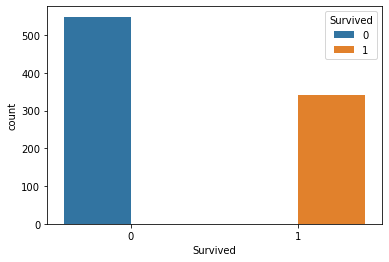

In [2]:
#counting th number of survived and not survived people and barplot them
print(df['Survived'].value_counts())
sns.countplot(x='Survived',hue='Survived',data=df)
#df.groupby('Survived')['PassengerId'].sum().plot()
#df['Survived'].plot.bar(x='Survived', rot=0)

In [3]:
#Calculation of the proportion of surviving 1st class passengers with
#  regards to the total number of 1st class passengers.

firstclass_passengers=len(df.loc[df['Pclass']==1])
sur=df.loc[df['Survived']==1]
firstclass_passengers
sur_firstclass=len(sur.loc[sur['Pclass']==1])
proportion=sur_firstclass/firstclass_passengers
proportion


0.6296296296296297

In [4]:
## Extra! for the Presentation
#here we can see that that 74% of women survived and almost 19% of the men survived
#which makes us ask what could be the reasons for this difference ? And were there a priority 
# to save passengers from higher classes? 
female_passengers=len(df.loc[df['Sex']=='female'])
sur=df.loc[df['Survived']==1]
sur_female=len(sur.loc[sur['Sex']=='female'])

male_passengers=len(df.loc[df['Sex']=='male'])
sur=df.loc[df['Survived']==1]
sur_male=len(sur.loc[sur['Sex']=='male'])

proportion_male=sur_male/male_passengers
proportion_female=sur_female/female_passengers

proportion_male
proportion_female
m=df.loc[df['Sex']=='male']

m_first_class=m.loc[m['Pclass']==1]
m_first_sur=m_first_class.loc[m_first_class['Survived']==1]
len(m_first_sur) # 45 male survivals from first class
                 # male total first class passengers 122 (proportion 38.8%). The total male survivals is 109

fm=df.loc[df['Sex']=='female']

fm_first_class=fm.loc[fm['Pclass']==1]
fm_first_sur=fm_first_class.loc[fm_first_class['Survived']==1]
len(fm_first_sur) # 91 female survivals from first class 
                  # female total fist class passengers 94 (proportion 96.8%). The total female survivals is 233


#We conclude that femals were rescued first and got on the Rescue Boats first and the first classes were prioteriesed 


91

<AxesSubplot:xlabel='Survived', ylabel='count'>

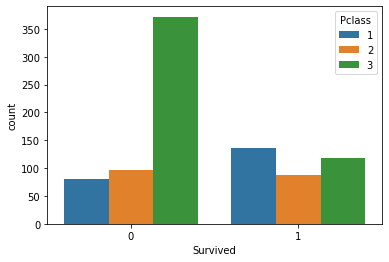

In [5]:
#Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
#male in green and female in salmon and there is male and female 890 passengers
# df['Pclass'].loc[df['Sex']=='male'].countplot(alpha = 0.3, kind='bar', color='green',label='male') 
# df['Pclass'].loc[df['Sex']=='female'].countplot(alpha = 0.3, kind='bar', color='salmon', label='female') 
sns.countplot(x='Survived',hue='Pclass',data=df)


<AxesSubplot:xlabel='Survived', ylabel='count'>

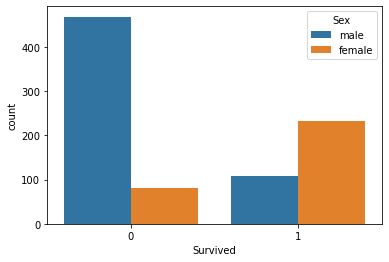

In [6]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:ylabel='Frequency'>

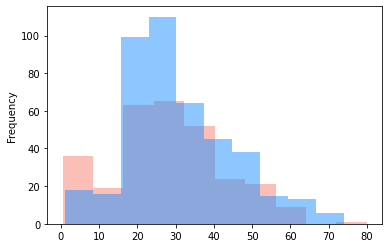

In [7]:
#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
from matplotlib import pyplot
import numpy
passenger_age=df[['Age','Survived']]
df['Age'].loc[df['Survived'] == 1].plot(alpha = 0.5, kind='hist', color='salmon')  
df['Age'].loc[df['Survived'] == 0].plot(alpha = 0.5, kind='hist', color='dodgerblue')
#suvived are in salmon
#The most deads where between 17 and 37 

In [8]:
#Calculating the average age for survived and drowned passengers separately. 
#first is the average of the sruvived passengers the non survived

age_mean_sur=round(df['Age'].loc[df['Survived']==1].mean(),3)
age_mean_usur=round(df['Age'].loc[df['Survived']==0].mean(),3)

#Replacing missing age values by the mean age.
for i in range (891) :
    if np.isnan(df['Age'].iloc[i]) == True:
        if df['Survived'].iloc[i] == 1 :
             df['Age'].iloc[i]= age_mean_sur
        else:
             df['Age'].iloc[i]= age_mean_usur
           




/home/mahmood/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
m_first_c1=m.loc[m['Pclass']==1]
m_first_c2=m.loc[m['Pclass']==2]
m_first_c3=m.loc[m['Pclass']==3]
fm_first_c1=fm.loc[fm['Pclass']==1]
fm_first_c2=fm.loc[fm['Pclass']==2]
fm_first_c3=fm.loc[fm['Pclass']==3]
fm_first_c3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [10]:
surv_m_c1=m_first_c1['Survived'].loc[m_first_c1['Survived']==1] #anotherwa
surv_m_c2=m_first_c2['Survived'].loc[m_first_c2['Survived']==1]
surv_m_c3=m_first_c3['Survived'].loc[m_first_c3['Survived']==1]
surv_fm_c1=fm_first_c1['Survived'].loc[fm_first_c1['Survived']==1]
surv_fm_c2=fm_first_c2['Survived'].loc[fm_first_c2['Survived']==1]
surv_fm_c3=fm_first_c3['Survived'].loc[fm_first_c3['Survived']==1]
surv_fm_c3

2      1
8      1
10     1
19     1
22     1
      ..
823    1
830    1
855    1
858    1
875    1
Name: Survived, Length: 72, dtype: int64

In [11]:
usurv_m_c1=m_first_c1['Survived'].loc[m_first_c1['Survived']==0]
usurv_m_c2=m_first_c2['Survived'].loc[m_first_c2['Survived']==0]
usurv_m_c3=m_first_c3['Survived'].loc[m_first_c3['Survived']==0]
usurv_fm_c1=fm_first_c1['Survived'].loc[fm_first_c1['Survived']==0]
usurv_fm_c2=fm_first_c2['Survived'].loc[fm_first_c2['Survived']==0]
usurv_fm_c3=fm_first_c3['Survived'].loc[fm_first_c3['Survived']==0]
usurv_fm_c2

41     0
199    0
312    0
357    0
772    0
854    0
Name: Survived, dtype: int64

In [12]:
#creating a table counting the number of surviving/dead
# passengers separately for 1st/2nd/3rd class and male/female.
surv_fm=fm['Survived'].loc[fm['Survived']==1]
surv_m=m['Survived'].loc[m['Survived']==1]

data_counting= {'survived male': [surv_m_c1.sum(), surv_m_c2.sum(), surv_m_c3.sum()]  ,
                'survived female': [surv_fm_c1.sum(), surv_fm_c2.sum(), surv_fm_c3.sum()]   , 
                'dead male': [usurv_m_c1.value_counts()[0], usurv_m_c2.value_counts()[0], usurv_m_c3.value_counts()[0]],
                'dead female': [usurv_fm_c1.value_counts()[0], usurv_fm_c2.value_counts()[0], usurv_fm_c3.value_counts()[0]]
 
}

df_counting= pd.DataFrame(data_counting,index=['1st Class','2nd Class','3d Class'])
df_counting
#People in the first classes had a better chance to survive especially female

,survived male,survived female,dead male,dead female
1st Class,45,91,77,3
2nd Class,17,70,91,6
3d Class,47,72,300,72


<AxesSubplot:xlabel='Age', ylabel='Sex'>

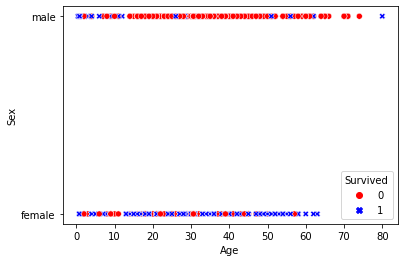

In [13]:

sns.scatterplot(x='Age', y='Sex', data=df, style='Survived', hue='Survived', palette=['red','blue'])


<AxesSubplot:xlabel='Age', ylabel='Pclass'>

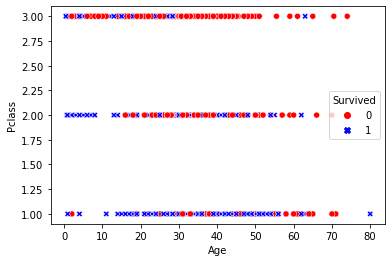

In [14]:
sns.scatterplot(x='Age', y='Pclass', data=df, style='Survived', hue='Survived', palette=['red','blue'])

$$ Logistic Regression $$

* We prepare the Data

* Building the Logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.626,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.0000,C148,C


In [17]:
X=df[['Age','Pclass','Sex','Fare','Embarked']]
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
X.shape,y.shape

((891, 5), (891,))

In [19]:
# We want to use the Logistic Regression on the Sex and Passenger Class to see how the predection 
# of Survivals/dead people will be
#But we first want to change Sex categorical values in binary values

X['Sex']=np.where(X['Sex']== 'male', 0, 1)

#As we see the error rates are not very low and variance between train and test score aren't
# high which indicates there is no overfitiing 

/tmp/ipykernel_33033/2961274478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=np.where(X['Sex']== 'male', 0, 1)


In [20]:
X

,Age,Pclass,Sex,Fare,Embarked
0,22.000,3,0,7.2500,S
1,38.000,1,1,71.2833,C
2,26.000,3,1,7.9250,S
3,35.000,1,1,53.1000,S
4,35.000,3,0,8.0500,S
...,...,...,...,...,...
886,27.000,2,0,13.0000,S
887,19.000,1,1,30.0000,S
888,30.626,3,1,23.4500,S
889,26.000,1,0,30.0000,C


In [21]:
#Imputing the Embarked column
from sklearn.impute import SimpleImputer
Embarked=df[['Embarked']]
Imputer= SimpleImputer(strategy='most_frequent')
#learn from Embarked 
Imputer.fit(Embarked)
#impute the missing values with the most frequent using transform
i=Imputer.transform(Embarked)
Embarked_dt=pd.DataFrame(i,columns=Embarked.columns)
Embarked_dt

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [22]:


#One Hot-encoding the Embarked Column

from sklearn.preprocessing import OneHotEncoder
#OnehotEncoder
ohc= OneHotEncoder(sparse=False, handle_unknown='ignore')
# learn from the Embarked column
ohc.fit(Embarked_dt)
#transform the column into a numpy array
t=ohc.transform(Embarked_dt)

#putting the array as a dataframe with Emarked labels as columns lebels
Embarked_ohc= pd.DataFrame(t, columns=ohc.get_feature_names())
Embarked_ohc
#X=X.append(Embarked_ohc)

X.shape,Embarked_dt.shape

/home/mahmood/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


((891, 5), (891, 1))

In [23]:
X=pd.concat([X,Embarked_ohc],axis=1)
X.drop('Embarked',axis=1,inplace=True)

In [24]:
X

,Age,Pclass,Sex,Fare,x0_C,x0_Q,x0_S
0,22.000,3,0,7.2500,0.0,0.0,1.0
1,38.000,1,1,71.2833,1.0,0.0,0.0
2,26.000,3,1,7.9250,0.0,0.0,1.0
3,35.000,1,1,53.1000,0.0,0.0,1.0
4,35.000,3,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...
886,27.000,2,0,13.0000,0.0,0.0,1.0
887,19.000,1,1,30.0000,0.0,0.0,1.0
888,30.626,3,1,23.4500,0.0,0.0,1.0
889,26.000,1,0,30.0000,1.0,0.0,0.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#df.isna().sum()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((623, 7), (623,), (268, 7), (268,))

In [26]:
#In Internet about Embark:
#There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. 
# More than 70% of the people boarded from Southampton. 
#Just under 20% boarded from Cherbourg and the rest boarded from Queenstown. 
# we will put the Nans of Embark to S
# df['Embarked']=df['Embarked'].fillna('S')

In [27]:
from sklearn.preprocessing import StandardScaler # it scales the standard deviation is 1 or we can use minmaxscaler which scales between 0 and 1
#X_train = (X_train-X_train.mean())/X_train.std()
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)


In [28]:
X_train

array([[-1.95059323, -1.63788124, -0.72077194, ..., -0.46306042,
        -0.31117678,  0.6002183 ],
       [ 0.09320526,  0.80326712, -0.72077194, ..., -0.46306042,
        -0.31117678,  0.6002183 ],
       [-2.18087173,  0.80326712,  1.38740139, ..., -0.46306042,
        -0.31117678,  0.6002183 ],
       ...,
       [ 0.88950832,  0.80326712, -0.72077194, ..., -0.46306042,
        -0.31117678,  0.6002183 ],
       [-1.18299821, -1.63788124,  1.38740139, ..., -0.46306042,
        -0.31117678,  0.6002183 ],
       [-0.6456817 , -1.63788124, -0.72077194, ..., -0.46306042,
        -0.31117678,  0.6002183 ]])

In [29]:
#Instantiation of the Model
m=LogisticRegression()

In [30]:
#Training the model
m.fit(X_train,y_train)

LogisticRegression()

In [31]:
# our coefficients
m.coef_, m.intercept_

(array([[-0.40401308, -0.82872477,  1.16124836,  0.02489245,  0.13193308,
          0.05430104, -0.14892079]]),
 array([-0.71447477]))

In [32]:
# score on the training data
m.score(X_train, y_train)

0.7913322632423756

In [33]:
score=m.score(X_test, y_test)

In [34]:
m.coef_

array([[-0.40401308, -0.82872477,  1.16124836,  0.02489245,  0.13193308,
         0.05430104, -0.14892079]])

In [35]:
#binning the Age column in young, average and old
from sklearn.preprocessing import KBinsDiscretizer
age_col=df[['Age']]
kbins= KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy="quantile")
#learn from Embarked
kbins.fit(age_col)
#bin the Age column
a_col= kbins.transform(age_col)
#setting edges to young, middleage, old 
edges=kbins.bin_edges_[0].round(1)
labels=[]
for s in range(len(edges)-1):
    edge1=edges[s]
    edge2=edges[s+1]
    labels.append(f'{edge1}_to_{edge2}_years')

age_col=pd.DataFrame(a_col,columns=labels)

age_col


,0.4_to_25.0_years,25.0_to_31.0_years,31.0_to_80.0_years
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,1.0,0.0
887,1.0,0.0,0.0
888,0.0,1.0,0.0
889,0.0,1.0,0.0


evaluation clasifier and dummy classifier

In [36]:
#we can also check the acuuracy like this
#Test accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report 
ypred = m.predict(X_test) 
accuracy_score(y_test,ypred) 
# Precision and Recall
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(f'Precision = {precision:.4f} \nRecall = {recall:.4f}')

Precision = 0.7642 
Recall = 0.7297


In [37]:
#Classification Report
print(classification_report(y_test, ypred, target_names=['not Survived', 'Survived']))

              precision    recall  f1-score   support

not Survived       0.81      0.84      0.83       157
    Survived       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



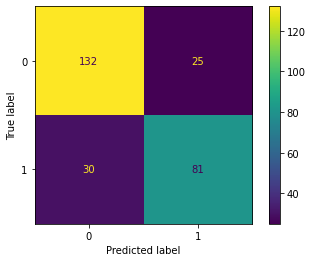

In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred, normalize=None)

In [39]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_dummy=dummy_clf.predict(X_test)
# Predicts that everyone did not Survive as this was the larger class.

print(classification_report(y_test, y_dummy, target_names=['not survived', 'survived'], zero_division=0))

              precision    recall  f1-score   support

not survived       0.59      1.00      0.74       157
    survived       0.00      0.00      0.00       111

    accuracy                           0.59       268
   macro avg       0.29      0.50      0.37       268
weighted avg       0.34      0.59      0.43       268



In [40]:
X,y

(        Age  Pclass  Sex     Fare  x0_C  x0_Q  x0_S
 0    22.000       3    0   7.2500   0.0   0.0   1.0
 1    38.000       1    1  71.2833   1.0   0.0   0.0
 2    26.000       3    1   7.9250   0.0   0.0   1.0
 3    35.000       1    1  53.1000   0.0   0.0   1.0
 4    35.000       3    0   8.0500   0.0   0.0   1.0
 ..      ...     ...  ...      ...   ...   ...   ...
 886  27.000       2    0  13.0000   0.0   0.0   1.0
 887  19.000       1    1  30.0000   0.0   0.0   1.0
 888  30.626       3    1  23.4500   0.0   0.0   1.0
 889  26.000       1    0  30.0000   1.0   0.0   0.0
 890  32.000       3    0   7.7500   0.0   1.0   0.0
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

Cross validation

In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
scores = cross_val_score(m, X_train, y_train, cv=5)

scores.round(3) 

array([0.768, 0.888, 0.752, 0.75 , 0.806])

In [43]:
f"Mean cross-validation score: {scores.mean(): 5.3f}"

'Mean cross-validation score:  0.793'

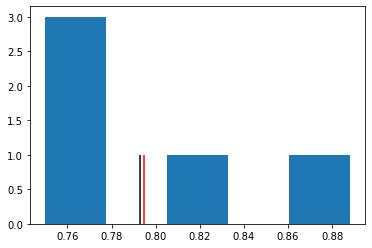

In [44]:
plt.hist(scores, bins=5) 
plt.vlines(scores.mean(),ymin=0,ymax=1, color='black')
plt.vlines(score,ymin=0,ymax=1, color='red') # this is the model score

In [45]:
precision 

0.7641509433962265

In [46]:
#How do i cross validate for prediction? Should i use only test data?
#Try 5-fold cross-validation with scoring=’precision’
#  and scoring=’recall’ on the Titanic dataset.
#from internet 

scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'roc_auc': 'roc_auc'}
cross_validation_scores = cross_validate(m, X, y, cv=5, scoring=scoring)

cross_validation_scores 


/home/mahmood/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mahmood/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{'fit_time': array([0.05492425, 0.05067968, 0.03834367, 0.03796554, 0.02970791]),
 'score_time': array([0.01315165, 0.0159924 , 0.00876427, 0.00624681, 0.00975323]),
 'test_accuracy': array([0.78212291, 0.8258427 , 0.79213483, 0.7752809 , 0.80898876]),
 'test_recall': array([0.71014493, 0.73529412, 0.72058824, 0.60294118, 0.72463768]),
 'test_precision': array([0.72058824, 0.79365079, 0.73134328, 0.75925926, 0.76923077]),
 'test_roc_auc': array([0.83372859, 0.84144385, 0.85220588, 0.84471925, 0.87116075])}

In [47]:
f"Mean cross-validation precision: {cross_validation_scores['test_precision'].mean(): 5.3f}"

'Mean cross-validation precision:  0.755'